<a href="https://colab.research.google.com/github/nicolassalomon96/aprendizaje_maquina_UNS/blob/master/TP5/Clustering_Crimes_in_EEUU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP5 - Clustering

Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

**Tasas de delitos violentos por estado de EE.UU**

Este conjunto de datos contiene estadísticas, en arrestos por cada 100,000 residentes por asalto, asesinato y violación en cada uno de los 50 estados de EE. UU. En 1973. También se da el porcentaje de la población que vive en áreas urbanas. El objetivo de este proyecto es identificar jerarquías de grupos de estados de EE. UU. Según los datos de tasas de delitos violentos. Siéntase libre de aumentar este conjunto de datos con otras fuentes.

## 1. Librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, AffinityPropagation

## 2. Analisis del Dataset

In [2]:
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
violent_crime = violent_crime.rename(columns={'Unnamed: 0':'State'})
violent_crime

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
violent_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


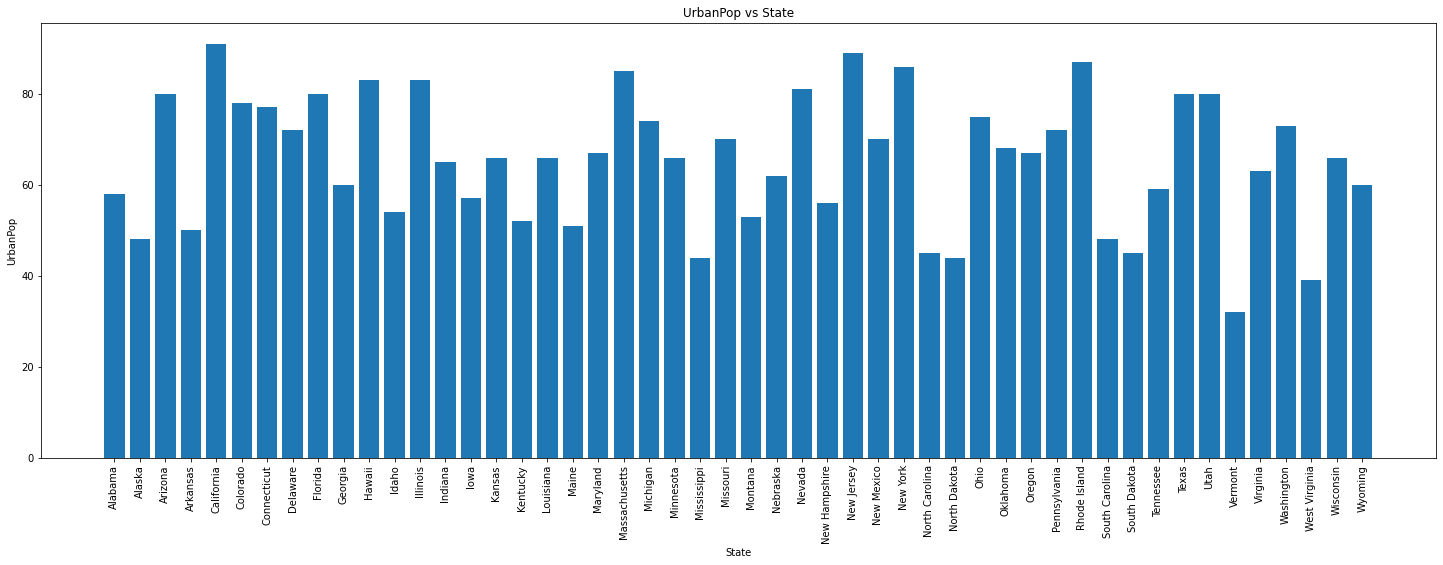

In [5]:
fig,ax = plt.subplots(figsize=(25,8))
plt.bar(violent_crime['State'],violent_crime['UrbanPop'])
plt.xticks(rotation=90)
plt.title('UrbanPop vs State')
plt.xlabel('State')
plt.ylabel('UrbanPop')
plt.show()

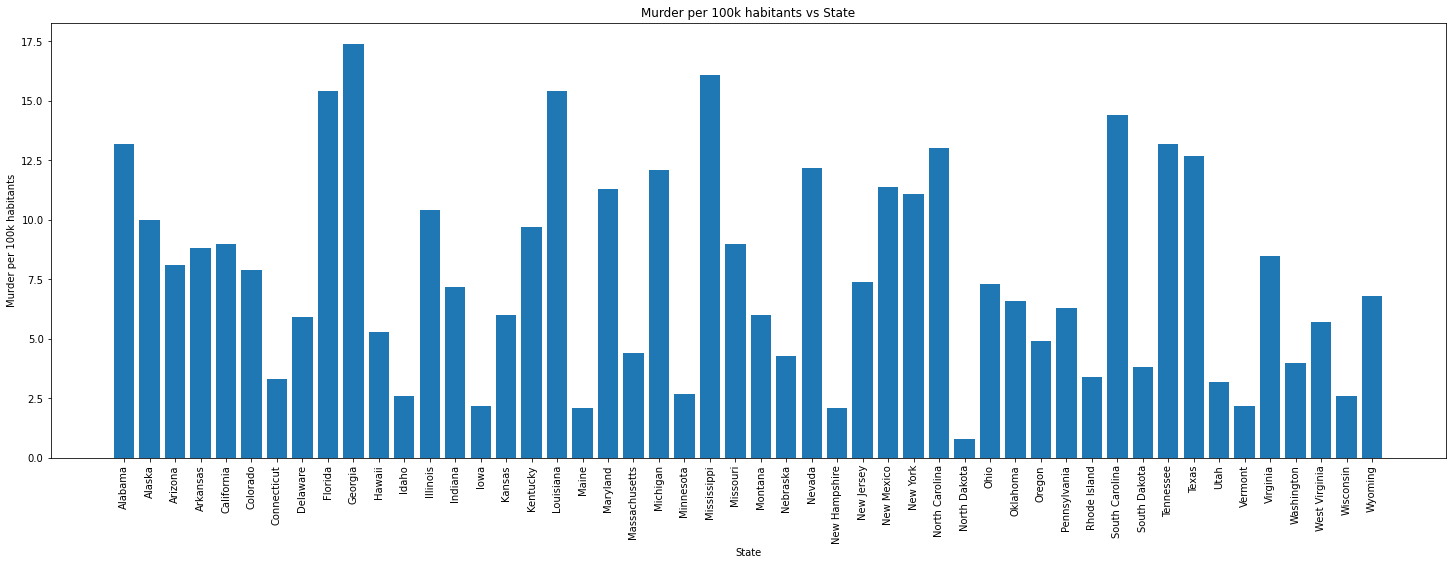

In [6]:
fig,ax = plt.subplots(figsize=(25,8))
plt.bar(violent_crime['State'],violent_crime['Murder'])
plt.xticks(rotation=90)
plt.title('Murder per 100k habitants vs State')
plt.xlabel('State')
plt.ylabel('Murder per 100k habitants')
plt.show()

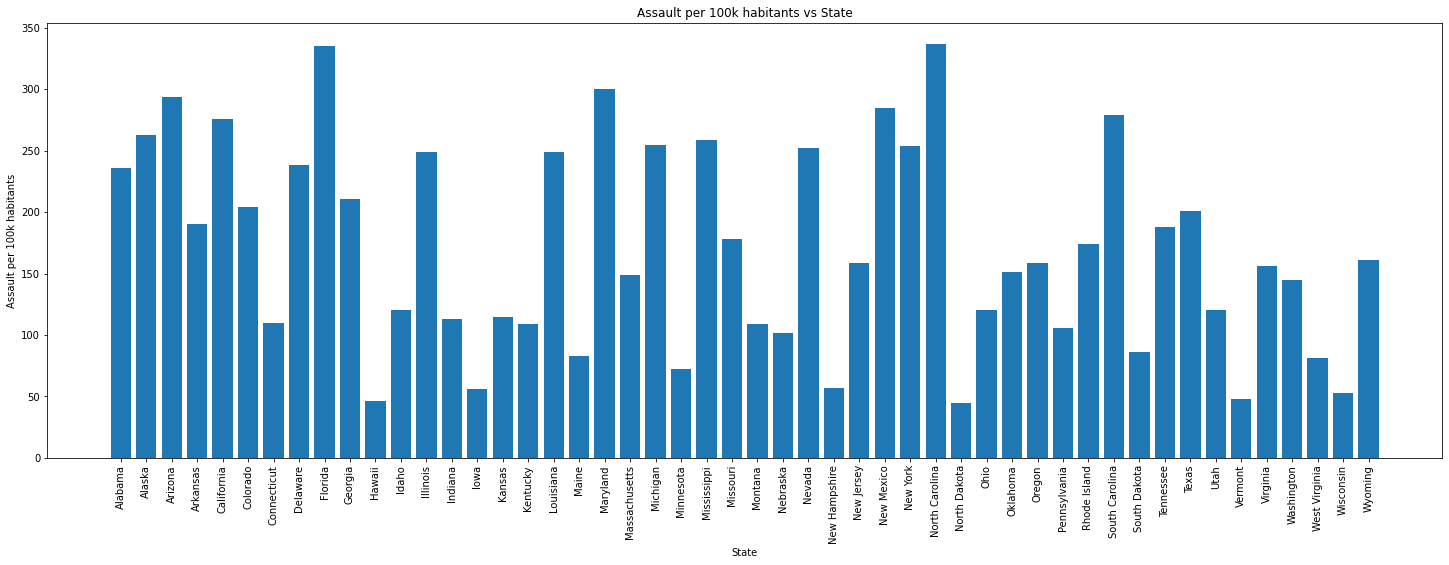

In [7]:
fig,ax = plt.subplots(figsize=(25,8))
plt.bar(violent_crime['State'],violent_crime['Assault'])
plt.xticks(rotation=90)
plt.title('Assault per 100k habitants vs State')
plt.xlabel('State')
plt.ylabel('Assault per 100k habitants')
plt.show()

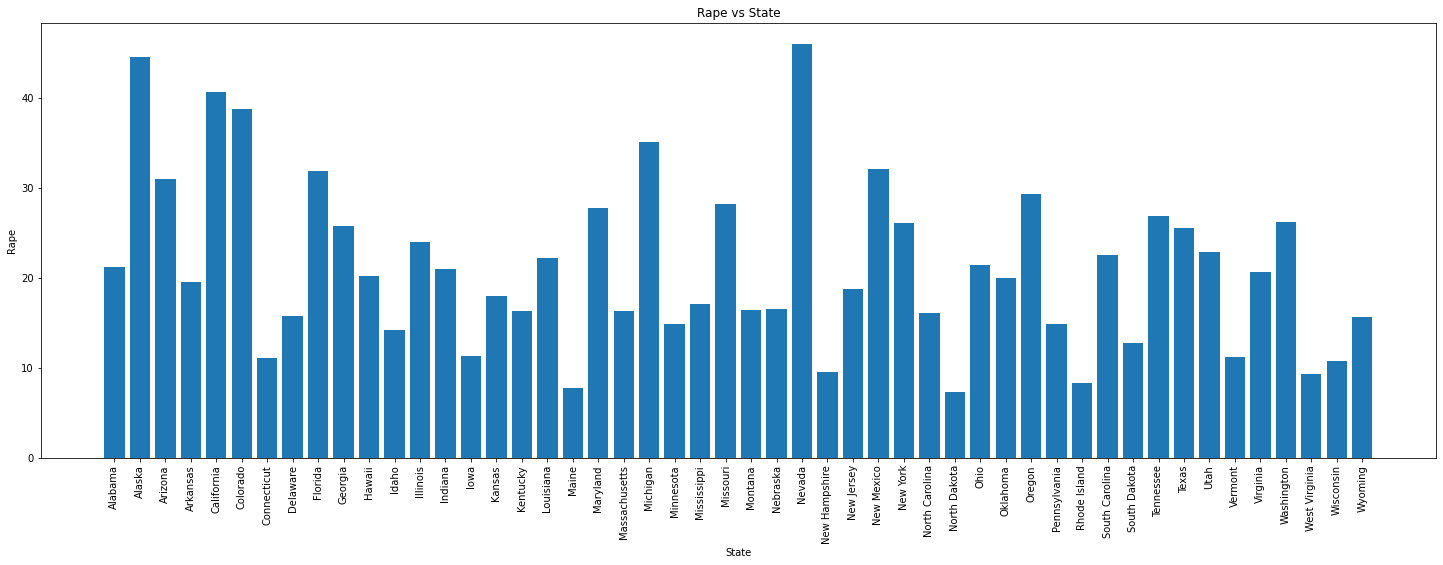

In [8]:
fig,ax = plt.subplots(figsize=(25,8))
plt.bar(violent_crime['State'],violent_crime['Rape'])
plt.xticks(rotation=90)
plt.title('Rape vs State')
plt.xlabel('State')
plt.ylabel('Rape')
plt.show()

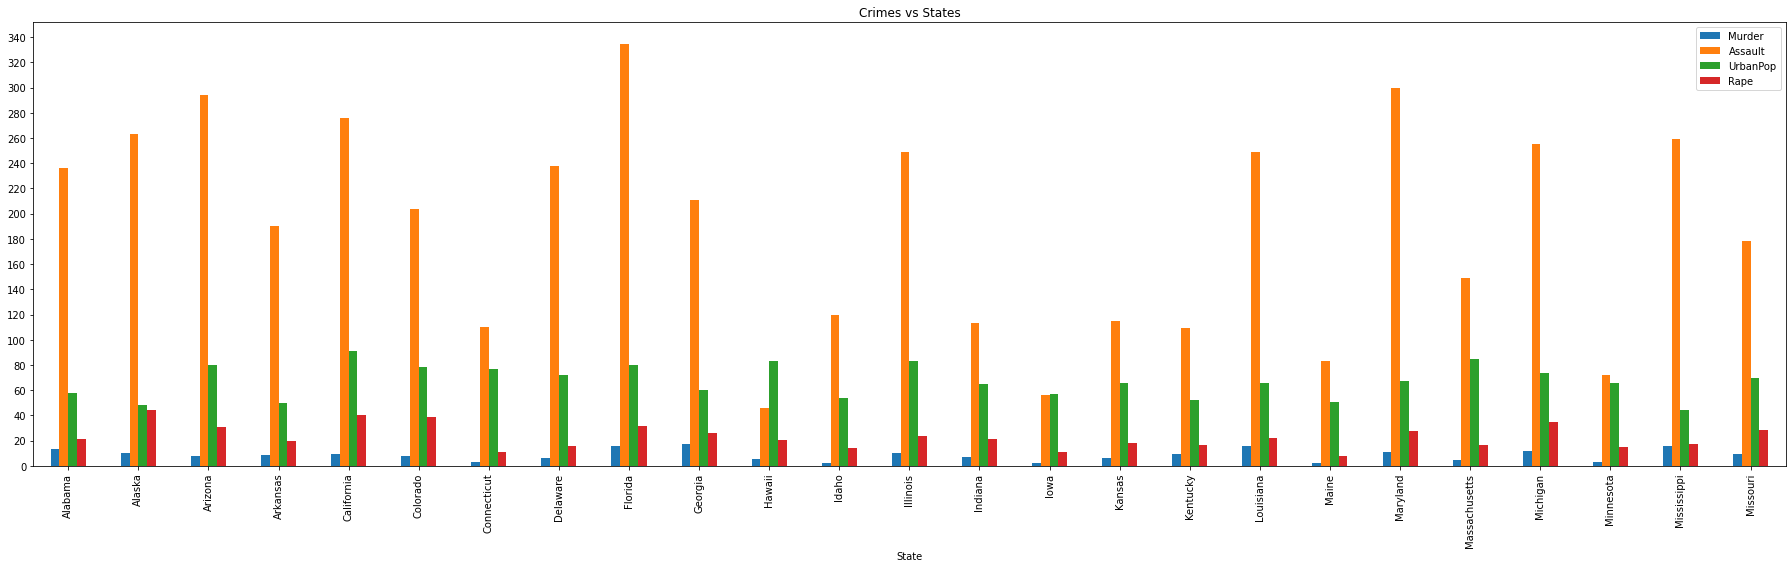

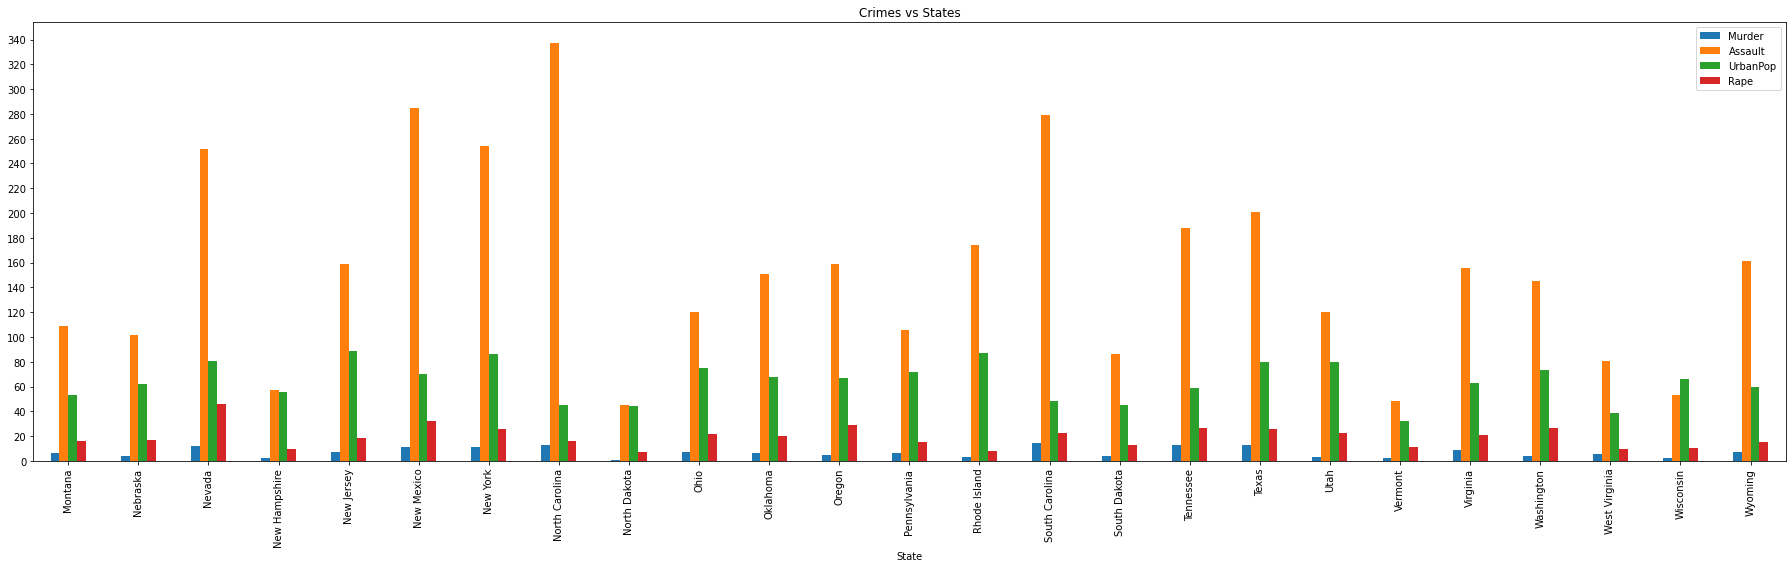

In [9]:
#Separamos el dataset para graficarlo mas claramente
violent_crime_1 = violent_crime.iloc[:25,:]
violent_crime_2 = violent_crime.iloc[25:,:]
violent_crime_1.plot(x='State', y=['Murder', 'Assault', 'UrbanPop', 'Rape'], kind="bar",figsize=(25,8), yticks=range(0,350,20), title='Crimes vs States')
plt.tight_layout()
violent_crime_2.plot(x='State', y=['Murder', 'Assault', 'UrbanPop', 'Rape'], kind="bar",figsize=(25,8), yticks=range(0,350,20), title='Crimes vs States')
plt.tight_layout()
plt.show()

## 3. K-means Clustering

A continuación se evaluará el número optimo de clusters a utilizar, para ello normalizamos los datos dado que el método de K-means emplea el cálculo de distancias y puede comportarse mal si las características individuales no se ven más o menos como datos estándar distribuidos normalmente. Normalizar ayuda al clustering porque los grupos se forman a partir de distancias, si hay atributos con escalas muy diferentes, los atributos de escala mayor dominarán las distancias.

In [10]:
crimes_df = violent_crime[['Murder', 'Assault', 'Rape', 'UrbanPop']]

crimes_df_scaled = StandardScaler().fit_transform(crimes_df)
cluster_range = range(1,20)
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  #Realizamos el clustering aplicando K-means
  clusters.fit(crimes_df_scaled)
  #Para cada valor de k, inicializaremos k-medias y usaremos el atributo de inercia para identificar la suma de las distancias al cuadrado de las muestras al centro del conglomerado más cercano.
  cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters":cluster_range, "cluster_errors": cluster_errors})

,num_clusters,cluster_errors
0,1,200.000000
1,2,104.961633
2,3,79.921703
3,4,57.554259
4,5,49.943064
5,6,45.135864
6,7,40.241578
7,8,37.107593
8,9,31.568707
9,10,27.446511


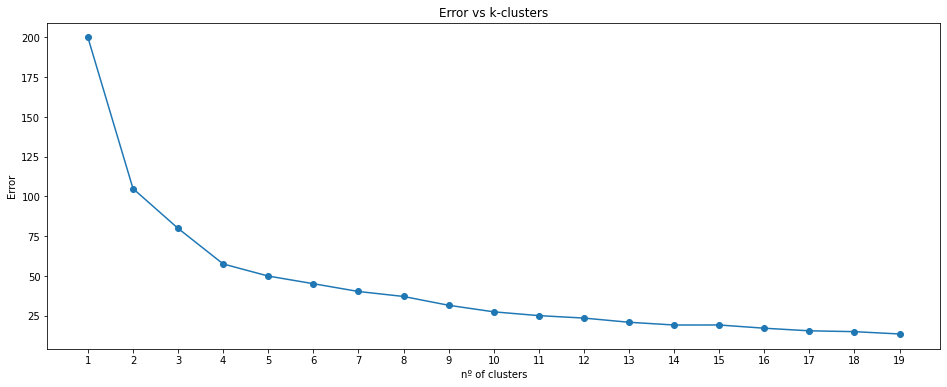

In [11]:
display(clusters_df[0:10])
plt.figure(figsize=(16,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
plt.xticks(cluster_range)
plt.title('Error vs k-clusters')
plt.xlabel('nº of clusters')
plt.ylabel('Error')
plt.show()

A medida que k aumenta, la suma de la distancia al cuadrado tiende a cero. Por ello, si establecemos k en el valor del número de muestras, cada muestra formará su propio grupo, lo que significa que la suma de las distancias al cuadrado es igual a cero.

A continuación se muestra una gráfica de la suma de las distancias al cuadrado para k en el rango especificado anteriormente. El valor óptimo de k se encuentra observando el punto en el que la gráfica realiza un "codo", en nuestro caso sería para k = 4.

Por ello, a continuación dividiremos los datos en 4 clusters.

In [12]:
clusters = KMeans(4)
pred_clusters = clusters.fit_predict(crimes_df_scaled)

violent_crime['cluster'] = pred_clusters
display(violent_crime)

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [13]:
#Calculamos los valores medios de cada cluster
mean_clusters = pd.DataFrame(round(violent_crime.groupby('cluster').mean(),1))
display(mean_clusters)

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,13.9,243.6,53.8,21.4
1,5.6,136.7,73.2,18.6
2,10.8,257.4,76.0,33.2
3,3.5,76.6,51.2,11.8


### 3.1. Gráfico en función del porcentaje de población urbana

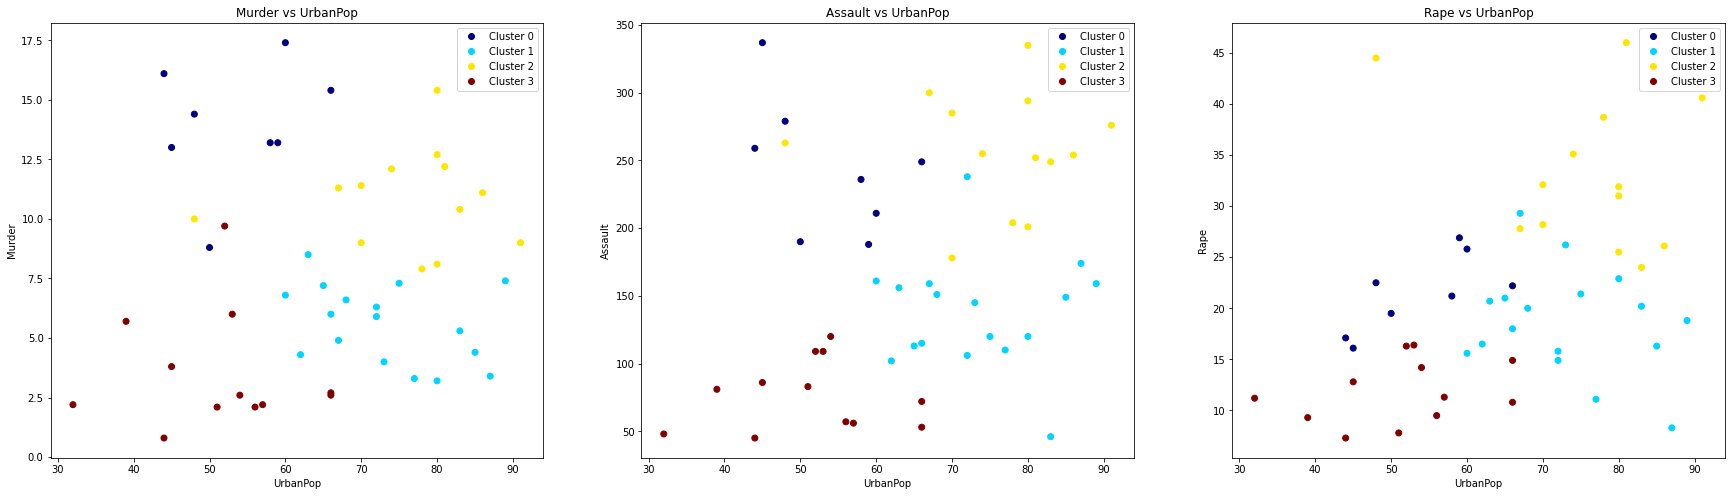

In [14]:
fig, axs = plt.subplots(1,3,figsize=(30,8))

plt.subplot(1,3,1)
figure = plt.scatter(x=violent_crime['UrbanPop'], y=violent_crime['Murder'], c=pred_clusters, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2','Cluster 3'])
plt.xlabel('UrbanPop')
plt.ylabel('Murder')
plt.title('Murder vs UrbanPop')

plt.subplot(1,3,2)
figure = plt.scatter(x=violent_crime['UrbanPop'], y=violent_crime['Assault'], c=pred_clusters, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2','Cluster 3'])
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('Assault vs UrbanPop')

plt.subplot(1,3,3)
figure = plt.scatter(x=violent_crime['UrbanPop'], y=violent_crime['Rape'], c=pred_clusters, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2','Cluster 3'])
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.title('Rape vs UrbanPop')

plt.show()

### 3.2. Grafico entre variables

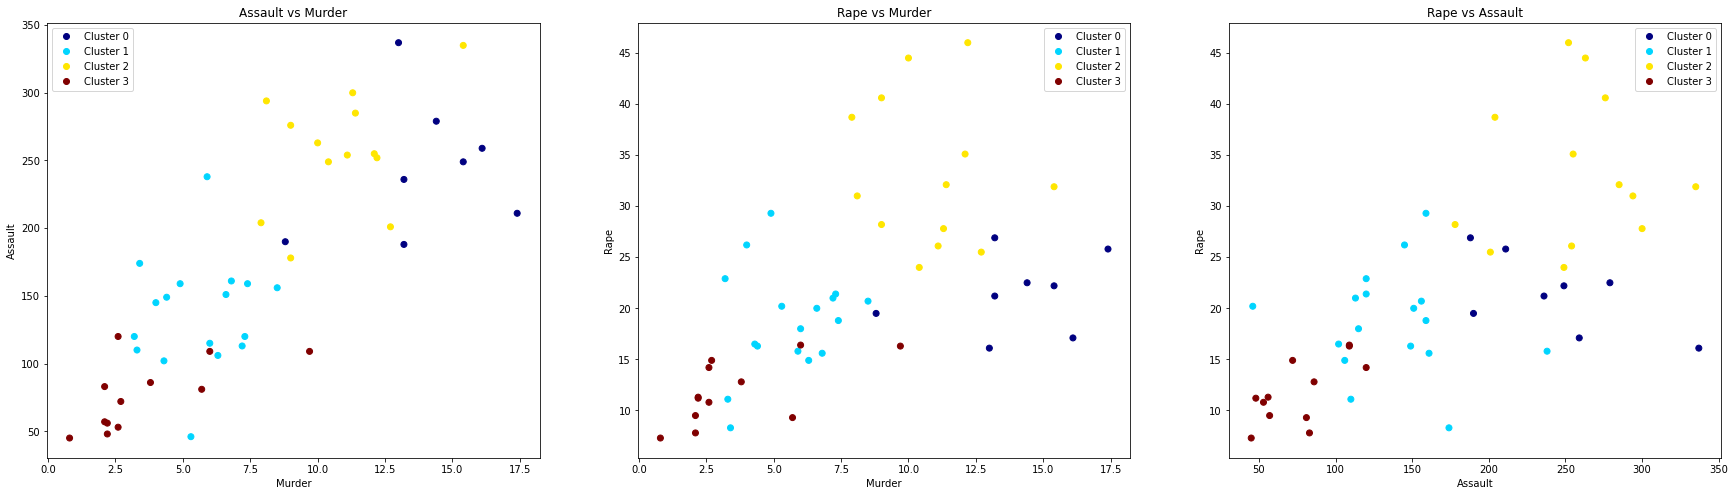

In [15]:
fig, axs = plt.subplots(1,3,figsize=(30,8))

plt.subplot(1,3,1)
figure = plt.scatter(x=violent_crime['Murder'], y=violent_crime['Assault'], c=pred_clusters, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2','Cluster 3'])
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('Assault vs Murder')

plt.subplot(1,3,2)
figure = plt.scatter(x=violent_crime['Murder'], y=violent_crime['Rape'], c=pred_clusters, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2','Cluster 3'])
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.title('Rape vs Murder')

plt.subplot(1,3,3)
figure = plt.scatter(x=violent_crime['Assault'], y=violent_crime['Rape'], c=pred_clusters, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2','Cluster 3'])
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.title('Rape vs Assault')

plt.show()

### 3.3. Correlación entre variables

In [16]:
variables_correlation = violent_crime[['Murder', 'Assault', 'Rape', 'UrbanPop']]
variables_correlation.corr()

,Murder,Assault,Rape,UrbanPop
Murder,1.000000,0.801873,0.563579,0.069573
Assault,0.801873,1.000000,0.665241,0.258872
Rape,0.563579,0.665241,1.000000,0.411341
UrbanPop,0.069573,0.258872,0.411341,1.000000


### 3.4. Estados pertenecientes a cada Cluster

In [17]:
print("Estados pertenecientes al Cluster 0")
display(violent_crime[violent_crime['cluster']==0])
print('\n')

print("Estados pertenecientes al Cluster 1")
display(violent_crime[violent_crime['cluster']==1])
print('\n')

print("Estados pertenecientes al Cluster 2")
display(violent_crime[violent_crime['cluster']==2])
print('\n')

print("Estados pertenecientes al Cluster 3")
display(violent_crime[violent_crime['cluster']==3])

Estados pertenecientes al Cluster 0


,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
3,Arkansas,8.8,190,50,19.5,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0




Estados pertenecientes al Cluster 1


,State,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
20,Massachusetts,4.4,149,85,16.3,1
26,Nebraska,4.3,102,62,16.5,1
29,New Jersey,7.4,159,89,18.8,1
34,Ohio,7.3,120,75,21.4,1
35,Oklahoma,6.6,151,68,20.0,1




Estados pertenecientes al Cluster 2


,State,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
8,Florida,15.4,335,80,31.9,2
12,Illinois,10.4,249,83,24.0,2
19,Maryland,11.3,300,67,27.8,2
21,Michigan,12.1,255,74,35.1,2
24,Missouri,9.0,178,70,28.2,2
27,Nevada,12.2,252,81,46.0,2




Estados pertenecientes al Cluster 3


,State,Murder,Assault,UrbanPop,Rape,cluster
11,Idaho,2.6,120,54,14.2,3
14,Iowa,2.2,56,57,11.3,3
16,Kentucky,9.7,109,52,16.3,3
18,Maine,2.1,83,51,7.8,3
22,Minnesota,2.7,72,66,14.9,3
25,Montana,6.0,109,53,16.4,3
28,New Hampshire,2.1,57,56,9.5,3
33,North Dakota,0.8,45,44,7.3,3
40,South Dakota,3.8,86,45,12.8,3
44,Vermont,2.2,48,32,11.2,3


## 4. Mean Shift


In [18]:
violent_crime_df2 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime_df2 = violent_crime_df2.rename(columns={'Unnamed: 0':'State'})
state_column = violent_crime['State']
violent_crime_df2 = violent_crime_df2.drop(['State'], axis=1)
violent_crime_df2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [19]:
bandwidth = estimate_bandwidth(violent_crime_df2, quantile= 0.3)
clusters_2 = MeanShift(bandwidth=bandwidth,bin_seeding=True, n_jobs=4)
clusters_2.fit(violent_crime_df2)

# Numero de clusters
labels = np.unique(clusters_2.labels_)
n_clusters_ = len(labels)
print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


In [20]:
pred_clusters_2 = clusters_2.fit_predict(violent_crime_df2)

In [21]:
violent_crime_df2['cluster'] = pred_clusters_2
violent_crime_df2.insert(0,'State', state_column)
display(violent_crime_df2)

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [22]:
#Calculamos los valores medios de cada cluster
mean_clusters_2 = pd.DataFrame(round(violent_crime_df2.groupby('cluster').mean(),1))
display(mean_clusters_2)

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,4.3,90.3,60.4,15.0
1,11.8,272.6,68.3,28.4
2,8.5,175.5,70.5,22.6


### 4.1. Gráfico en función del porcentaje de población urbana

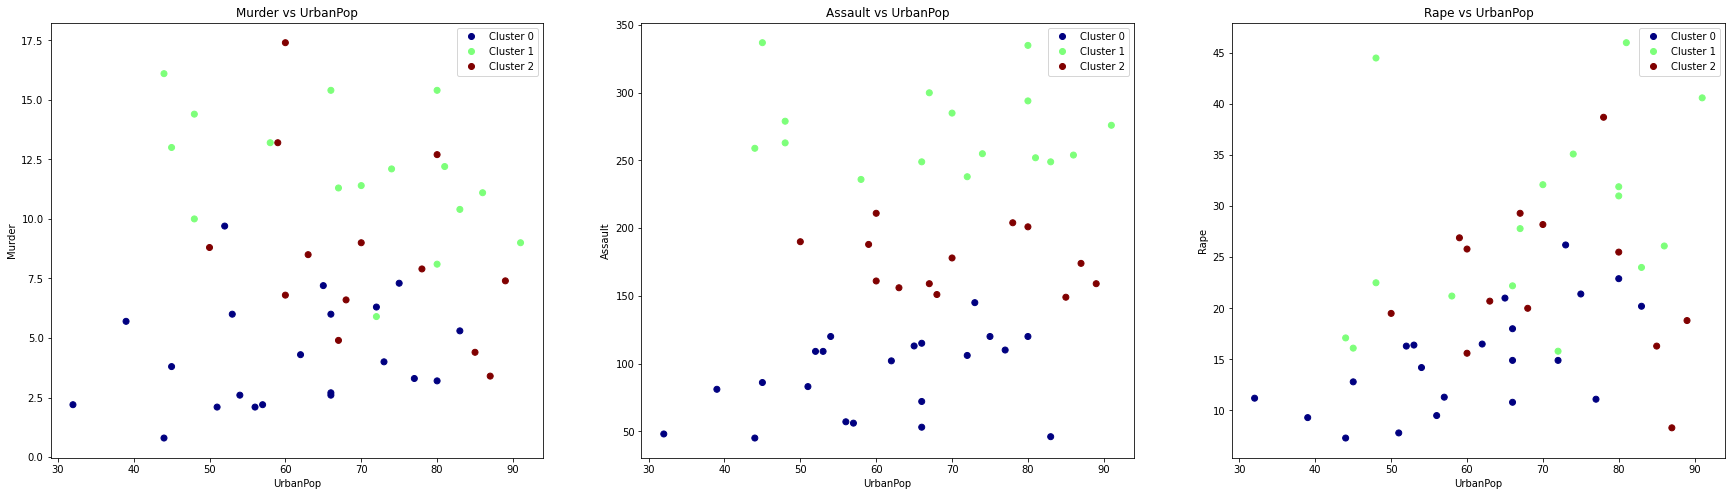

In [23]:
fig, axs = plt.subplots(1,3,figsize=(30,8))

plt.subplot(1,3,1)
figure = plt.scatter(x=violent_crime_df2['UrbanPop'], y=violent_crime_df2['Murder'], c=pred_clusters_2, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'])
plt.xlabel('UrbanPop')
plt.ylabel('Murder')
plt.title('Murder vs UrbanPop')

plt.subplot(1,3,2)
figure = plt.scatter(x=violent_crime_df2['UrbanPop'], y=violent_crime_df2['Assault'], c=pred_clusters_2, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'])
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('Assault vs UrbanPop')

plt.subplot(1,3,3)
figure = plt.scatter(x=violent_crime_df2['UrbanPop'], y=violent_crime_df2['Rape'], c=pred_clusters_2, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'])
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.title('Rape vs UrbanPop')

plt.show()

### 4.2. Gráfico entre variables

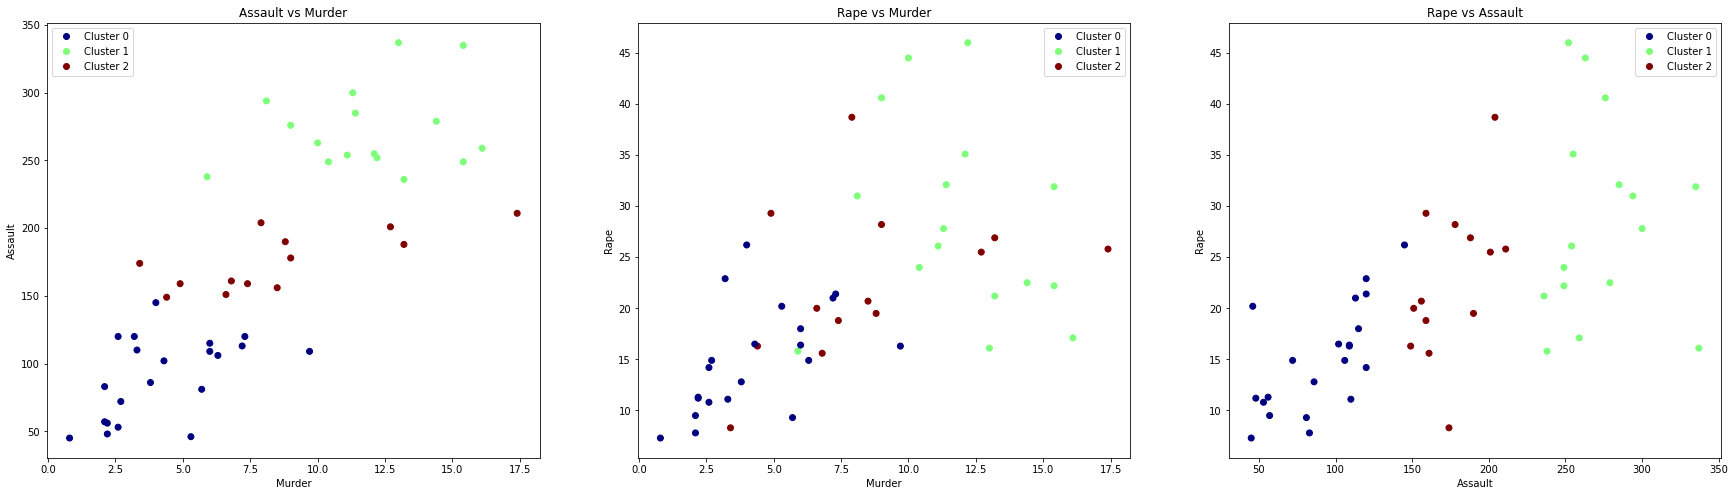

In [24]:
fig, axs = plt.subplots(1,3,figsize=(30,8))

plt.subplot(1,3,1)
figure = plt.scatter(x=violent_crime_df2['Murder'], y=violent_crime_df2['Assault'], c=pred_clusters_2, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'])
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('Assault vs Murder')

plt.subplot(1,3,2)
figure = plt.scatter(x=violent_crime_df2['Murder'], y=violent_crime_df2['Rape'], c=pred_clusters_2, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'])
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.title('Rape vs Murder')

plt.subplot(1,3,3)
figure = plt.scatter(x=violent_crime_df2['Assault'], y=violent_crime_df2['Rape'], c=pred_clusters_2, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2'])
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.title('Rape vs Assault')

plt.show()

### 4.3. Estados pertenecientes a cada Cluster

In [25]:
print("Estados pertenecientes al Cluster 0")
display(violent_crime_df2[violent_crime_df2['cluster']==0])
print('\n')

print("Estados pertenecientes al Cluster 1")
display(violent_crime_df2[violent_crime_df2['cluster']==1])
print('\n')

print("Estados pertenecientes al Cluster 2")
display(violent_crime_df2[violent_crime_df2['cluster']==2])
print('\n')

Estados pertenecientes al Cluster 0


,State,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,0
10,Hawaii,5.3,46,83,20.2,0
11,Idaho,2.6,120,54,14.2,0
13,Indiana,7.2,113,65,21.0,0
14,Iowa,2.2,56,57,11.3,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
18,Maine,2.1,83,51,7.8,0
22,Minnesota,2.7,72,66,14.9,0
25,Montana,6.0,109,53,16.4,0




Estados pertenecientes al Cluster 1


,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
17,Louisiana,15.4,249,66,22.2,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1




Estados pertenecientes al Cluster 2


,State,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,2
5,Colorado,7.9,204,78,38.7,2
9,Georgia,17.4,211,60,25.8,2
20,Massachusetts,4.4,149,85,16.3,2
24,Missouri,9.0,178,70,28.2,2
29,New Jersey,7.4,159,89,18.8,2
35,Oklahoma,6.6,151,68,20.0,2
36,Oregon,4.9,159,67,29.3,2
38,Rhode Island,3.4,174,87,8.3,2
41,Tennessee,13.2,188,59,26.9,2


## 5. Affinity Propagation

In [26]:
violent_crime_df3 = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime_df3 = violent_crime_df3.rename(columns={'Unnamed: 0':'State'})
state_column = violent_crime_df3['State']
violent_crime_df3 = violent_crime_df3.drop(['State'], axis=1)
violent_crime_df3

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [27]:
clusters_3 = AffinityPropagation()
clusters_3.fit(violent_crime_df3)

# Numero de clusters
labels_3 = np.unique(clusters_3.labels_)
n_clusters_3 = len(labels_3)
print("Number of estimated clusters: {}".format(n_clusters_3))

Number of estimated clusters: 5


In [28]:
pred_clusters_3 = clusters_3.fit_predict(violent_crime_df3)

violent_crime_df3['cluster'] = pred_clusters_3
violent_crime_df3.insert(0,'State', state_column)
display(violent_crime_df3)

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,4
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [29]:
#Calculamos los valores medios de cada cluster
mean_clusters_3 = pd.DataFrame(round(violent_crime_df3.groupby('cluster').mean(),1))
display(mean_clusters_3)

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,3.0,57.2,55.4,11.8
1,12.3,305.0,65.0,26.9
2,11.5,253.1,70.3,29.3
3,8.2,173.3,70.6,22.8
4,5.1,107.8,62.7,16.1


### 5.1. Gráfico en función del porcentaje de población urbana

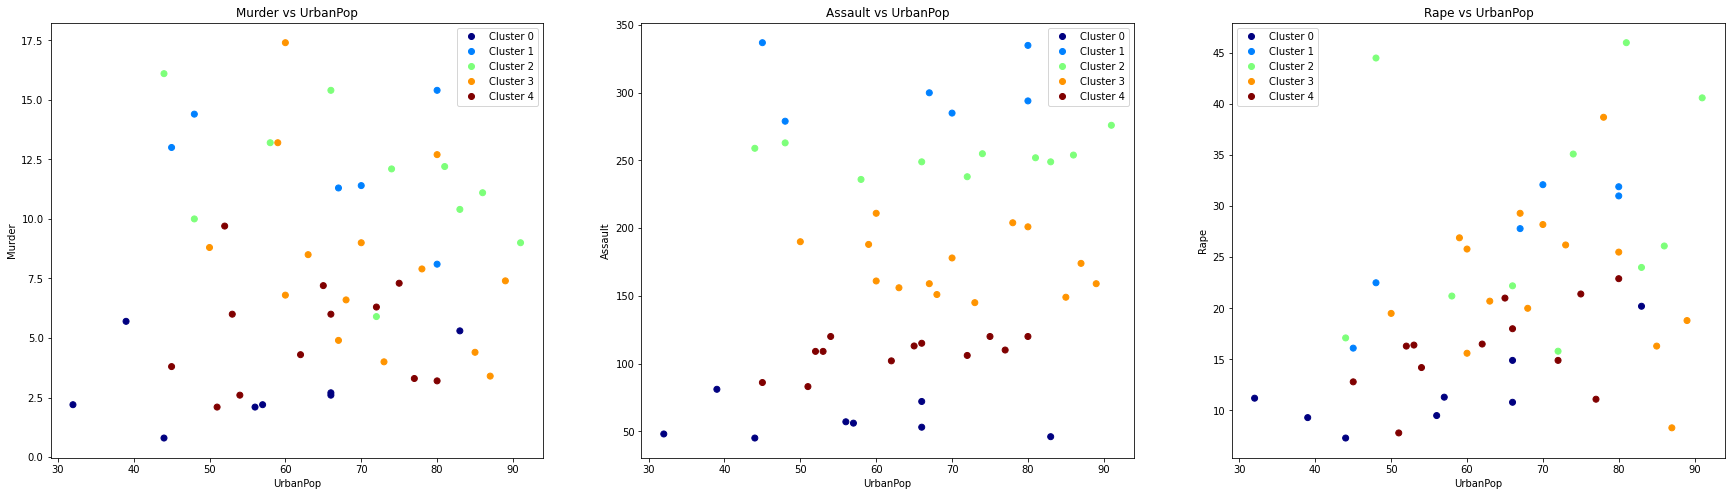

In [30]:
fig, axs = plt.subplots(1,3,figsize=(30,8))

plt.subplot(1,3,1)
figure = plt.scatter(x=violent_crime_df3['UrbanPop'], y=violent_crime_df3['Murder'], c=pred_clusters_3, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])
plt.xlabel('UrbanPop')
plt.ylabel('Murder')
plt.title('Murder vs UrbanPop')

plt.subplot(1,3,2)
figure = plt.scatter(x=violent_crime_df3['UrbanPop'], y=violent_crime_df3['Assault'], c=pred_clusters_3, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('Assault vs UrbanPop')

plt.subplot(1,3,3)
figure = plt.scatter(x=violent_crime_df3['UrbanPop'], y=violent_crime_df3['Rape'], c=pred_clusters_3, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])
plt.xlabel('UrbanPop')
plt.ylabel('Rape')
plt.title('Rape vs UrbanPop')

plt.show()

### 5.2. Gráfico entre variables

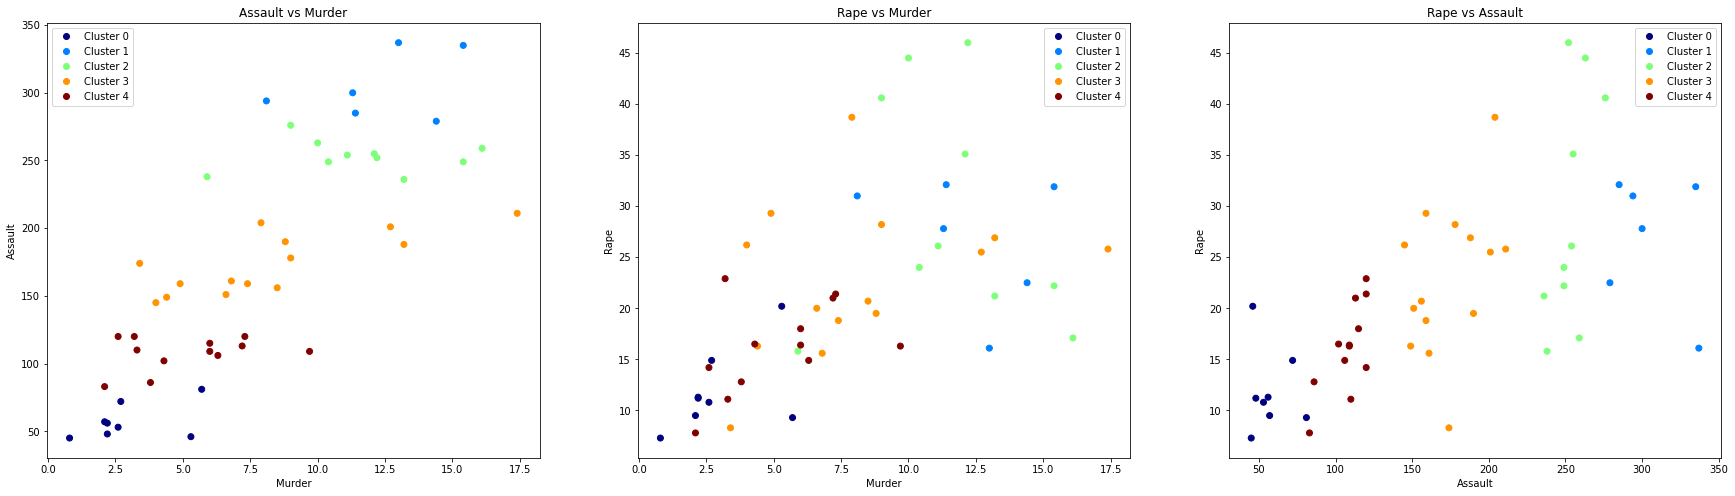

In [31]:
fig, axs = plt.subplots(1,3,figsize=(30,8))

plt.subplot(1,3,1)
figure = plt.scatter(x=violent_crime_df3['Murder'], y=violent_crime_df3['Assault'], c=pred_clusters_3, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.title('Assault vs Murder')

plt.subplot(1,3,2)
figure = plt.scatter(x=violent_crime_df3['Murder'], y=violent_crime_df3['Rape'], c=pred_clusters_3, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])
plt.xlabel('Murder')
plt.ylabel('Rape')
plt.title('Rape vs Murder')

plt.subplot(1,3,3)
figure = plt.scatter(x=violent_crime_df3['Assault'], y=violent_crime_df3['Rape'], c=pred_clusters_3, cmap='jet')
plt.legend(handles=figure.legend_elements()[0], labels=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'])
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.title('Rape vs Assault')

plt.show()

### 5.3. Estados pertenecientes a cada Cluster

In [32]:
print("Estados pertenecientes al Cluster 0")
display(violent_crime_df3[violent_crime_df3['cluster']==0])
print('\n')

print("Estados pertenecientes al Cluster 1")
display(violent_crime_df3[violent_crime_df3['cluster']==1])
print('\n')

print("Estados pertenecientes al Cluster 2")
display(violent_crime_df3[violent_crime_df3['cluster']==2])
print('\n')

print("Estados pertenecientes al Cluster 3")
display(violent_crime_df3[violent_crime_df3['cluster']==3])
print('\n')

print("Estados pertenecientes al Cluster 4")
display(violent_crime_df3[violent_crime_df3['cluster']==4])
print('\n')

Estados pertenecientes al Cluster 0


,State,Murder,Assault,UrbanPop,Rape,cluster
10,Hawaii,5.3,46,83,20.2,0
14,Iowa,2.2,56,57,11.3,0
22,Minnesota,2.7,72,66,14.9,0
28,New Hampshire,2.1,57,56,9.5,0
33,North Dakota,0.8,45,44,7.3,0
44,Vermont,2.2,48,32,11.2,0
47,West Virginia,5.7,81,39,9.3,0
48,Wisconsin,2.6,53,66,10.8,0




Estados pertenecientes al Cluster 1


,State,Murder,Assault,UrbanPop,Rape,cluster
2,Arizona,8.1,294,80,31.0,1
8,Florida,15.4,335,80,31.9,1
19,Maryland,11.3,300,67,27.8,1
30,New Mexico,11.4,285,70,32.1,1
32,North Carolina,13.0,337,45,16.1,1
39,South Carolina,14.4,279,48,22.5,1




Estados pertenecientes al Cluster 2


,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
4,California,9.0,276,91,40.6,2
7,Delaware,5.9,238,72,15.8,2
12,Illinois,10.4,249,83,24.0,2
17,Louisiana,15.4,249,66,22.2,2
21,Michigan,12.1,255,74,35.1,2
23,Mississippi,16.1,259,44,17.1,2
27,Nevada,12.2,252,81,46.0,2
31,New York,11.1,254,86,26.1,2




Estados pertenecientes al Cluster 3


,State,Murder,Assault,UrbanPop,Rape,cluster
3,Arkansas,8.8,190,50,19.5,3
5,Colorado,7.9,204,78,38.7,3
9,Georgia,17.4,211,60,25.8,3
20,Massachusetts,4.4,149,85,16.3,3
24,Missouri,9.0,178,70,28.2,3
29,New Jersey,7.4,159,89,18.8,3
35,Oklahoma,6.6,151,68,20.0,3
36,Oregon,4.9,159,67,29.3,3
38,Rhode Island,3.4,174,87,8.3,3
41,Tennessee,13.2,188,59,26.9,3




Estados pertenecientes al Cluster 4


,State,Murder,Assault,UrbanPop,Rape,cluster
6,Connecticut,3.3,110,77,11.1,4
11,Idaho,2.6,120,54,14.2,4
13,Indiana,7.2,113,65,21.0,4
15,Kansas,6.0,115,66,18.0,4
16,Kentucky,9.7,109,52,16.3,4
18,Maine,2.1,83,51,7.8,4
25,Montana,6.0,109,53,16.4,4
26,Nebraska,4.3,102,62,16.5,4
34,Ohio,7.3,120,75,21.4,4
37,Pennsylvania,6.3,106,72,14.9,4


## 6. Conclusiones

Luego de analizar los 3 métodos de Clustering propuestos (K-means, Mean Shift y Affinity Propagation) podemos llegar a las siguientes conclusiones:

* Se puede observar que el tamaño de la población (variable: UrbanPop) no se relaciona en gran parte con la tasa de crímenes, en general en todos los tamaños de población existen tasas de crímenes alta y bajas para cada cluster.
Esto queda demostrado al analizar la correlación entre dichas variables, el valor más alto se obtiene en la correlación entre el porcentaje de población urbana y las violaciones, pero solo con un valor de 0.4.

* Algo distinto ocurre al analizar entre variables. Para todos los métodos de Clustering empleados, se observa que a medida que aumenta la tasa de asaltos, aumenta la tasa de homicidios. De hecho al analizar la correlación entre ellos, vemos un valor alto (correlación = 0.8).

* Por otro lado, es visible cierta correlación entre los homicidios y las violaciones, con una correlación de 0.56, al igual que entre los asaltos y las violaciones, con una correlación de 0.66. Las bajas tasas de homicidio en un estado parecen indicar también un menor número de violaciones.